In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [29]:
# 1. Load the data
# Load Brent oil prices
brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])
brent_data.set_index('Date', inplace=True)
brent_data.reset_index(inplace=True)
# Extract year, month, and day features
brent_data['Year'] = brent_data['Date'].dt.year
brent_data['Month'] = brent_data['Date'].dt.month
brent_data['Day'] = brent_data['Date'].dt.day


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_5180\2585301116.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])


In [30]:
# Load GDP data
gdp_data = pd.read_csv('../data/GDP.csv')
gdp_data.set_index('Country', inplace=True)
gdp_data


,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
Africa Eastern and Southern,AFE,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
Africa Western and Central,AFW,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,...,8.339481e+11,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735328e+09,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09
"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11


In [31]:
# To insert the mean value of each column into its missing rows:
gdp_data.fillna(gdp_data.mean(numeric_only=True).round(1), inplace=True)

# For median:
gdp_data.fillna(gdp_data.median(numeric_only=True).round(1), inplace=True)

gdp_data

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,7.127083e+10,7.274846e+10,7.639516e+10,8.236303e+10,9.048173e+10,9.182705e+10,1.021722e+11,1.059782e+11,1.111099e+11,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,3.599791e+12
Africa Eastern and Southern,AFE,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,3.599791e+12
Africa Western and Central,AFW,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,...,8.339481e+11,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
Angola,AGO,7.127083e+10,7.274846e+10,7.639516e+10,8.236303e+10,9.048173e+10,9.182705e+10,1.021722e+11,1.059782e+11,1.111099e+11,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,7.127083e+10,7.274846e+10,7.639516e+10,8.236303e+10,9.048173e+10,9.182705e+10,1.021722e+11,1.059782e+11,1.111099e+11,...,6.735328e+09,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09
"Yemen, Rep.",YEM,7.127083e+10,7.274846e+10,7.639516e+10,8.236303e+10,9.048173e+10,9.182705e+10,1.021722e+11,1.059782e+11,1.111099e+11,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,2.826371e+12,2.739712e+12,3.211350e+12,3.599791e+12
South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11


In [ ]:
import pandas as pd

# Load the original CSV
gdp_data = pd.read_csv('../data/GDP.csv')

#  Melt the DataFrame to convert years into rows
melted_df = pd.melt(gdp_data, id_vars=['Country', 'Country Code'], 
                     var_name='Year', value_name='GDP')

# Clean up the DataFrame
# Remove rows with missing GDP values
melted_df.dropna(subset=['GDP'], inplace=True)

# Convert the 'year' column in melted_df to integer
melted_df['Year'] = melted_df['Year'].astype(int)

# Save the converted data to a new CSV file
melted_df.to_csv('../data/gdp_convert.csv', index=False)

# Display the first few rows of the converted DataFrame
melted_df


,Country,Country Code,Year,GDP
1,Africa Eastern and Southern,AFE,1960,2.112502e+10
2,Afghanistan,AFG,1960,5.377778e+08
3,Africa Western and Central,AFW,1960,1.044764e+10
13,Australia,AUS,1960,1.860656e+10
14,Austria,AUT,1960,6.592694e+09
...,...,...,...,...
16752,Samoa,WSM,2022,8.324216e+08
16753,Kosovo,XKX,2022,9.429156e+09
16755,South Africa,ZAF,2022,4.058697e+11
16756,Zambia,ZMB,2022,2.978445e+10


In [33]:
# Load the Brent Oil Prices data
brent_oil_prices =  pd.read_csv('../data/Copy of BrentOilPrices.csv')
# Convert the 'Date' column to datetime, handling inconsistencies
brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
brent_oil_prices['Year'] = brent_oil_prices['Date'].dt.year
# Load the population data
population_data = pd.read_csv('../data/gdp_convert.csv')

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_5180\718477375.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_5180\718477375.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)


In [34]:
# Merge both DataFrames on the date
merged_data = pd.merge(brent_oil_prices, melted_df, left_on='Year', right_on='Year', how='inner')

# Drop the redundant 'Year' column after merge
merged_data.drop(columns=['Year'], inplace=True)

# Save the merged data to a new CSV file
merged_data.to_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\weekTen\data\merged_data.csv', index=False)

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Admin.DESKTOP-M4R2VLU\\weekTen\\data\\merged_data.csv'

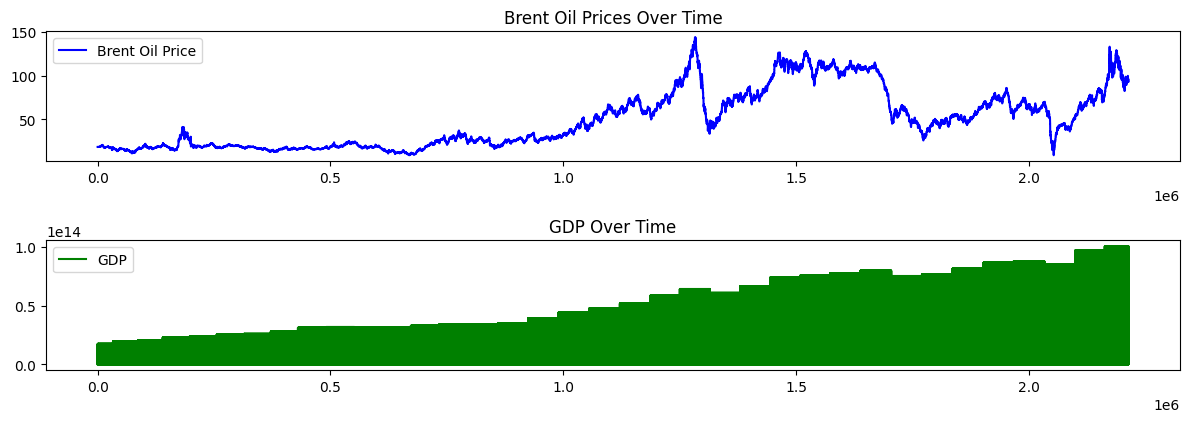

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(merged_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(merged_data['GDP'], label='GDP', color='green')
plt.title('GDP Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Assuming merged_data is already defined and contains the 'Price' column
price_array = merged_data['Price'].values

# Optionally, reduce the dataset size for testing
price_array = price_array[:1000]  # Use a subset for quicker testing

# Change Point Detection
algo = rpt.Pelt(model="l2").fit(price_array)

# Adjust the penalty value to optimize performance
result = algo.predict(pen=10)  # Try increasing the penalty

# Display the detected change points
print("Detected change points:", result)

Detected change points: [1000]


c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


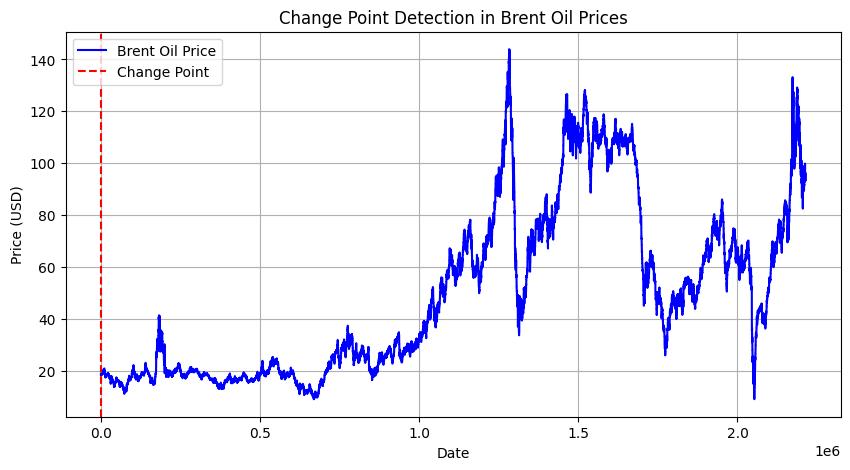

In [ ]:
# Plotting change points
plt.figure(figsize=(10, 5))
plt.plot(merged_data.index, merged_data['Price'], label='Brent Oil Price', color='blue')
for cp in result:
    plt.axvline(x=merged_data.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == result[0] else "")
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#  Select only numeric columns
# This will exclude non-numeric columns like 'Country' or 'Country Code'
merged_data_numeric = merged_data.select_dtypes(include=['number'])

# Check for missing values in the numeric DataFrame
print(merged_data_numeric.isnull().sum())  # Check for NaN values
#  Drop rows with missing values (or handle them as necessary)
merged_data_numeric.dropna(inplace=True)

# Fit the VAR model
model = VAR(merged_data_numeric)
results = model.fit(maxlags=15, ic='aic')

# Step 6: Summary of the VAR model
print(results.summary())

Price    0
GDP      0
dtype: int64
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Nov, 2024
Time:                     08:23:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    53.8906
Nobs:                 2.21352e+06    HQIC:                   53.8903
Log likelihood:      -6.59251e+07    FPE:                2.53651e+23
AIC:                      53.8902    Det(Omega_mle):     2.53643e+23
--------------------------------------------------------------------
Results for equation Price
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000352         0.000097            3.623           0.000
L1.Price          1.003285         0.000673         1491.616           0.000
L1.GDP           -0.000000         0.0000

In [ ]:
 #Model Validation (using RMSE)
actual = merged_data['Price'][-10:]  # Last 10 actual values (for comparison)

predicted = merged_data['Price']
predicted = merged_data['Price'][-10:]  # Use the same last 10 for comparison
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.0
